In [1]:
%reset -f

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

import numpy as np
from numpy import loadtxt

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_gaussian_quantiles

In [2]:
# # load data
# dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')

# # split data into X and y
# X = dataset[:,0:8]
# y = dataset[:,8]

# ======================================================================================================================

# Training Data
r1 = np.random.randint(0,100)
r2 = np.random.randint(0,100)

X1, y1 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, n_classes=2, random_state=r1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=r2)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# ==================================================

# Test Data
r3 = np.random.randint(0,100)
r4 = np.random.randint(0,100)

X3, y3 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, n_classes=2, random_state=r3)
X4, y4 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=r4)

Xt = np.concatenate((X3, X4))
yt = np.concatenate((y3, - y4 + 1))

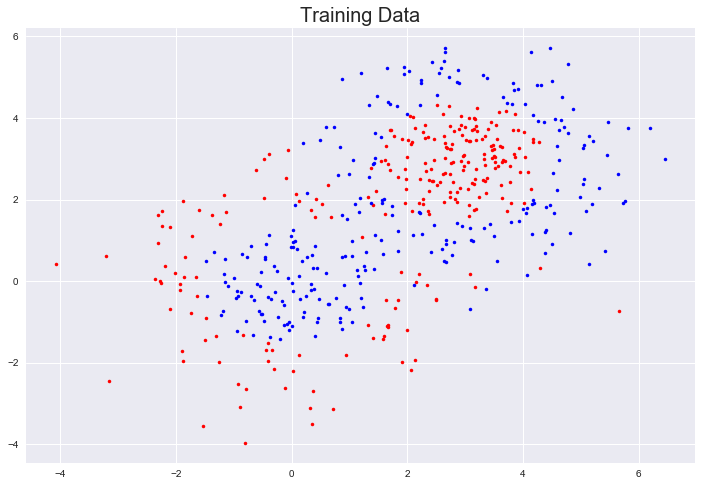

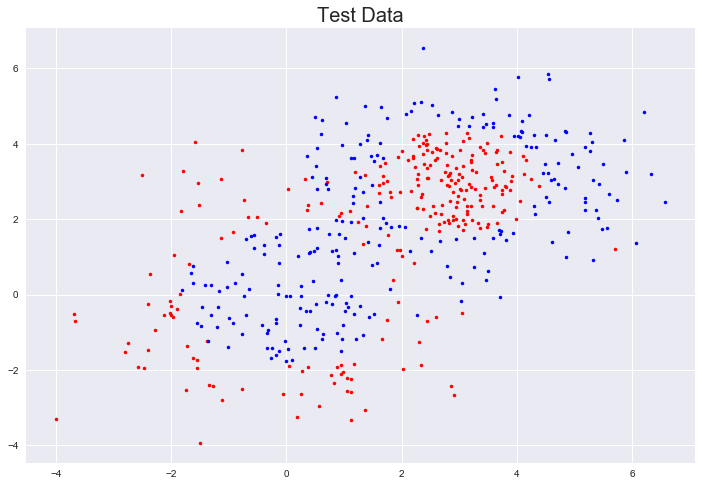

In [3]:
# Visualize the data (differentiated by label)

# Plot training data
Xr = X[y == 1]
Xb = X[y == 0]

plt.figure(figsize=[12,8])
plt.plot(Xr[:,0], Xr[:,1], 'r.')
plt.plot(Xb[:,0], Xb[:,1], 'b.')
plt.title('Training Data', fontsize=20)
plt.show()

# Plot test data
Xr = Xt[yt == 1]
Xb = Xt[yt == 0]

plt.figure(figsize=[12,8])
plt.plot(Xr[:,0], Xr[:,1], 'r.')
plt.plot(Xb[:,0], Xb[:,1], 'b.')
plt.title('Test Data', fontsize=20)
plt.show()

In [4]:
# split data into train and test sets
seed = np.random.randint(100)
test_size = 0.33
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train  = X
y_train  = y
X_test = Xt
y_test = yt

In [5]:
# fit model to training data
model = XGBClassifier(max_depth=4, n_estimators=600)
model.fit(X_train, y_train);

In [ ]:
# make predictions for test data
y_pred = [round(value) for value in model.predict(X_test)]

In [7]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print "Accuracy:", accuracy * 100.0, '%'

Accuracy: 87.8 %


In [ ]:
scoreList = []
numEstimatorList = [1]
numEstimatorList.extend(range(10,1001,10))

for i in numEstimatorList:
    thisModel = XGBClassifier(max_depth=4, n_estimators=i)
    thisModel.fit(X_train, y_train);
    thisPred = np.array([round(value) for value in thisModel.predict(X_test)])
    scoreList.append(accuracy_score(y_test, thisPred))

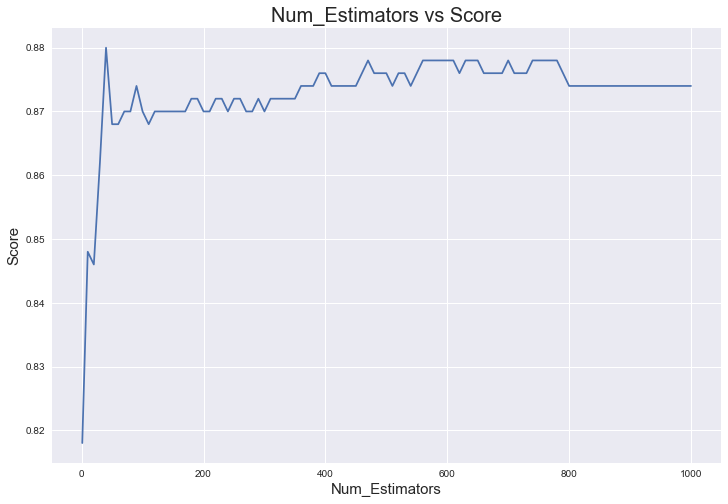

In [9]:
plt.figure(figsize=[12,8])
plt.plot(numEstimatorList, scoreList)
plt.title('Num_Estimators vs Score', fontsize = 20)
plt.xlabel('Num_Estimators', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.show()